# ***Exploratory Data Analysis Financial Data***

- Create a stock trend similarity function comparison maker using a forecaster
- I want to take each function for the past month, and see which stocks are following a related trend

Import Packages

In [1]:
# Data Processing & Analysis
import pandas as pd
print(f"pandas: {pd.__version__}")

import numpy as np
print(f"numpy: {np.__version__}")

import yfinance as yf
print(f"yfinance: {yf.__version__}")

from datetime import datetime, timedelta

import sklearn
print(f"scikit-learn: {sklearn.__version__}")
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, TimeSeriesSplit

# Visualization
import matplotlib
print(f"matplotlib: {matplotlib.__version__}")
import matplotlib.pyplot as plt

import seaborn as sns
print(f"seaborn: {sns.__version__}")

# Machine Learning Models
from sklearn.ensemble import (
   RandomForestRegressor,
   GradientBoostingRegressor, 
   AdaBoostRegressor,
   VotingRegressor,
   StackingRegressor,
   BaggingRegressor
)
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression

import xgboost as xgb
print(f"xgboost: {xgb.__version__}")
from xgboost import XGBRegressor

# Time Series Specific
import statsmodels
print(f"statsmodels: {statsmodels.__version__}")
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from bs4 import BeautifulSoup
import requests
import re 

# Model Evaluation
from sklearn.metrics import (
   mean_squared_error,
   mean_absolute_error,
   r2_score,
   accuracy_score,
   precision_score,
   recall_score,
   f1_score
)

pandas: 2.2.3
numpy: 2.2.0
yfinance: 0.2.50
scikit-learn: 1.6.0
matplotlib: 3.10.0
seaborn: 0.13.2
xgboost: 2.1.3
statsmodels: 0.14.4


Extract S&P 500 list

In [2]:
r = requests.get('https://stockanalysis.com/list/sp-500-stocks/')

soup = BeautifulSoup(r.content, 'html.parser')

# Main =>
s = soup.find('main', class_='contain')

# Find all tds with class "sym svelte-eurwtr"
tds = s.find_all('td', class_='sym svelte-eurwtr')

SPY = []

for item in tds:
    # Find the text within the td
    ticker = item.find('a')
    ticker = ticker.text
    ticker = re.sub(r'[^a-zA-Z0-9]', '-', ticker)
    SPY.append(ticker)

print(SPY)

['AAPL', 'NVDA', 'MSFT', 'AMZN', 'GOOG', 'GOOGL', 'META', 'TSLA', 'AVGO', 'BRK-B', 'WMT', 'LLY', 'JPM', 'V', 'MA', 'ORCL', 'XOM', 'UNH', 'COST', 'PG', 'HD', 'NFLX', 'JNJ', 'BAC', 'CRM', 'ABBV', 'KO', 'CVX', 'TMUS', 'MRK', 'WFC', 'CSCO', 'ACN', 'NOW', 'PEP', 'AXP', 'MCD', 'BX', 'IBM', 'DIS', 'LIN', 'TMO', 'MS', 'ABT', 'ADBE', 'AMD', 'PM', 'ISRG', 'GS', 'PLTR', 'GE', 'INTU', 'CAT', 'TXN', 'QCOM', 'VZ', 'BKNG', 'DHR', 'T', 'BLK', 'RTX', 'SPGI', 'PFE', 'HON', 'NEE', 'CMCSA', 'ANET', 'AMGN', 'PGR', 'LOW', 'SYK', 'UNP', 'TJX', 'SCHW', 'ETN', 'AMAT', 'BA', 'BSX', 'KKR', 'C', 'UBER', 'COP', 'PANW', 'ADP', 'DE', 'FI', 'BMY', 'LMT', 'GILD', 'NKE', 'CB', 'UPS', 'ADI', 'MMC', 'MDT', 'VRTX', 'MU', 'SBUX', 'PLD', 'GEV', 'LRCX', 'MO', 'SO', 'EQIX', 'CRWD', 'PYPL', 'SHW', 'ICE', 'CME', 'AMT', 'APH', 'ELV', 'TT', 'MCO', 'CMG', 'INTC', 'KLAC', 'ABNB', 'DUK', 'PH', 'CDNS', 'WM', 'DELL', 'MDLZ', 'MAR', 'MSI', 'WELL', 'AON', 'CI', 'HCA', 'PNC', 'ITW', 'SNPS', 'REGN', 'CTAS', 'CL', 'USB', 'FTNT', 'ZTS', 'MC

Gather Moving Average Data

In [3]:
def process_df(df):
    """
    Calculate the percent change for a day
    Calculate the moving average for 20 and 30 day periods
    Calculate the momentum
    """
    # Calculate Daily % Change based on previous day's closing price
    df['Daily%Change'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)).round(4)

    df['5DaySMA'] = df['Daily%Change'].rolling(window=5).mean()
    df['10DaySMA'] = df['Daily%Change'].rolling(window=10).mean()

    return df


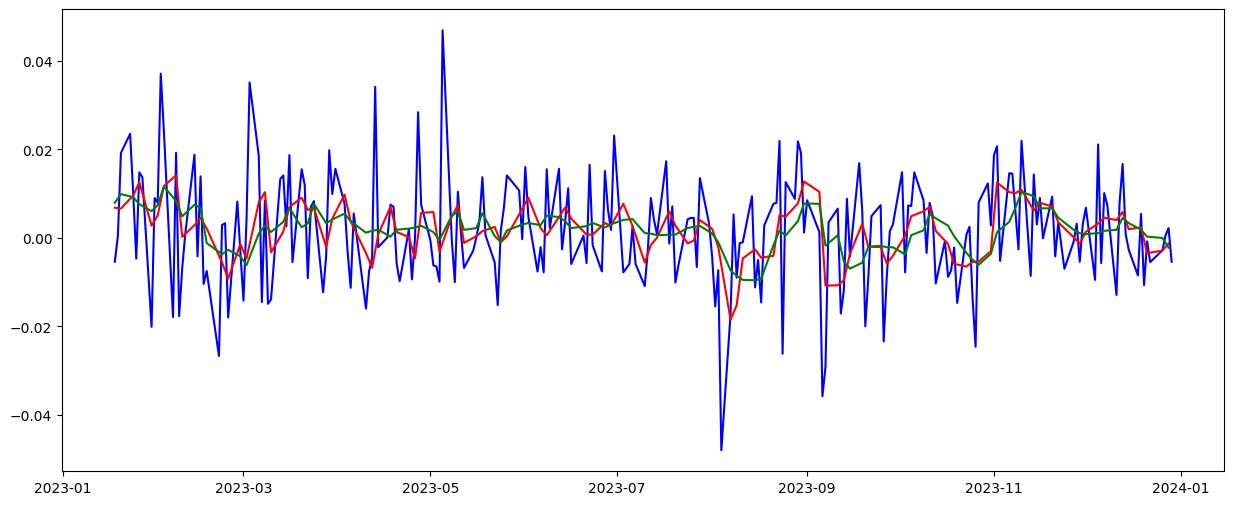

So we can see that the SMA is representative of the actual direction of the price return percentages


In [68]:
plt.figure(figsize=(15, 6))

plt.plot(apple['Date'], apple['Daily%Change'], color="blue")
plt.plot(apple['Date'].iloc[0:len(apple):2], apple['5DaySMA'].iloc[0:len(apple):2], color="red")
plt.plot(apple['Date'].iloc[0:len(apple):2], apple['10DaySMA'].iloc[0:len(apple):2], color="green")

plt.show()

print("So we can see that the SMA is representative of the actual direction of the price return percentages")

Prepare DataSet

Regression ML Modeling

Store in Datafile